In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

## Задача 1. 

Поиграемся с датасетом про диабет (он совсем легкий). 

In [103]:
data = pd.read_csv('Diabetes Binary Classification.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

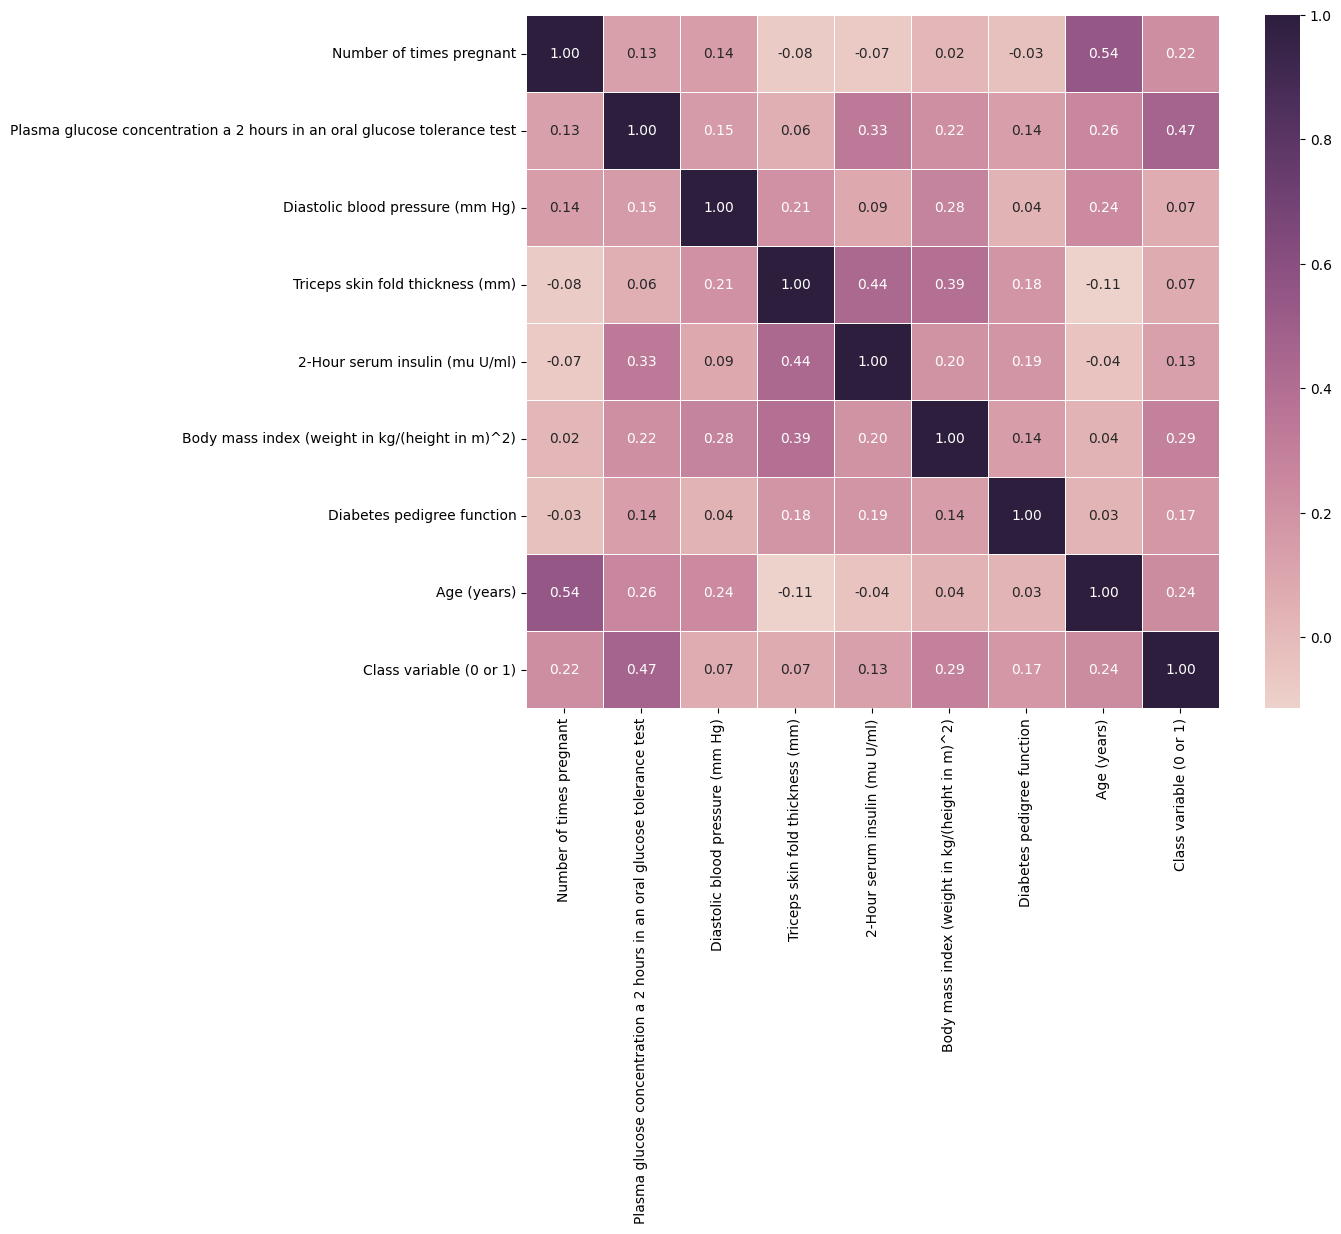

In [104]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.cubehelix_palette(as_cmap=True), square=True)

In [105]:
data.drop('Diastolic blood pressure (mm Hg)', axis=1, inplace=True)
data.drop('Triceps skin fold thickness (mm)', axis=1, inplace=True)
data.isna().any()


Number of times pregnant                                                    False
Plasma glucose concentration a 2 hours in an oral glucose tolerance test    False
2-Hour serum insulin (mu U/ml)                                              False
Body mass index (weight in kg/(height in m)^2)                              False
Diabetes pedigree function                                                  False
Age (years)                                                                 False
Class variable (0 or 1)                                                     False
dtype: bool

In [106]:
X = data.drop('Class variable (0 or 1)', axis=1)
y = data['Class variable (0 or 1)']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [107]:
y.value_counts()
#несбалансированная выборка

0    500
1    268
Name: Class variable (0 or 1), dtype: int64

In [108]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85       445
           1       0.51      0.75      0.60       131

    accuracy                           0.78       576
   macro avg       0.71      0.77      0.73       576
weighted avg       0.82      0.78      0.79       576
               precision    recall  f1-score   support

           0       0.89      0.74      0.81       140
           1       0.52      0.75      0.61        52

    accuracy                           0.74       192
   macro avg       0.70      0.75      0.71       192
weighted avg       0.79      0.74      0.76       192



In [109]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       433
           1       0.53      0.72      0.61       143

    accuracy                           0.77       576
   macro avg       0.71      0.76      0.73       576
weighted avg       0.81      0.77      0.78       576
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       134
           1       0.57      0.74      0.65        58

    accuracy                           0.76       192
   macro avg       0.72      0.75      0.73       192
weighted avg       0.78      0.76      0.76       192



In [110]:
#precision - % of correct predictions, т. е. здесь как регрессия, так и svc предсказывают наличие диабета гораздо хуже, чем его отсутствие?

Целевая переменная тут явно обозначена как Class variable (очевидно, есть у человека диабет или нет)

## Задача 2. 

Второй датасет - про покупателей велосипедов. 

In [111]:
data = pd.read_csv('bike_buyers_clean.csv')
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [112]:
for elem in data:
    print(set(data[f'{elem}']))

{28672, 26625, 12291, 18435, 16390, 24584, 22538, 14347, 28683, 16406, 20504, 20505, 16410, 26651, 26654, 20514, 24611, 20518, 26663, 12332, 20528, 18484, 14389, 16438, 26678, 12344, 28729, 20535, 18491, 24637, 18494, 24643, 26693, 18504, 14417, 16466, 22610, 16468, 18517, 28758, 20567, 14432, 12389, 16487, 26728, 16489, 22633, 22634, 22636, 14443, 18545, 20598, 20606, 28799, 18560, 16514, 26757, 14469, 20619, 18572, 26765, 28815, 22672, 20625, 18577, 18580, 24725, 26778, 14493, 14495, 24738, 18594, 12452, 16549, 24745, 14507, 26796, 16559, 18607, 20657, 14514, 22707, 20659, 14517, 18613, 12472, 28858, 22719, 26818, 18626, 20678, 22730, 26829, 12496, 14545, 14544, 14547, 12497, 12503, 22743, 18649, 14554, 12507, 20698, 12510, 26849, 24801, 26852, 16614, 20711, 14569, 28906, 14572, 26863, 18674, 28915, 28918, 20729, 26879, 14592, 26886, 24842, 14602, 16651, 12558, 14608, 20754, 20758, 18711, 12568, 24857, 28957, 16675, 12581, 22821, 24871, 12585, 14633, 28972, 12590, 22830, 12591, 26928

In [113]:
data.isna().any()

ID                  False
Marital Status      False
Gender              False
Income              False
Children            False
Education           False
Occupation          False
Home Owner          False
Cars                False
Commute Distance    False
Region              False
Age                 False
Purchased Bike      False
dtype: bool

In [114]:
def commute(x):
    if x == '5-10 Miles':
        return 3
    elif x == '5-10 Miles':
        return 4
    else:
        return int(x[0])
    
def age(x):
    if x <= 40:
        return 0
    elif 40 < x <= 55:
        return 1
    elif 55 < x <= 70:
        return 2
    else:
         return 3

data.drop('ID', axis=1, inplace=True)

data['Marital Status'] = data['Marital Status'].apply(lambda x: 1 if x == 'Married' else 0)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
data['Home Owner'] = data['Home Owner'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Purchased Bike'] = data['Purchased Bike'].apply(lambda x: 1 if x == 'Yes' else 0)

data['Commute Distance'] = data['Commute Distance'].apply(commute)
data['Age'] = data['Age'].apply(age)

In [115]:
new_cols1 = pd.get_dummies(data.Region, prefix='prefix', drop_first=True)
data.drop('Region', axis=1, inplace=True)
data = data.join(new_cols1)

new_cols2 = pd.get_dummies(data.Education, prefix='prefix', drop_first=True)
data.drop('Education', axis=1, inplace=True)
data = data.join(new_cols2)

new_cols3 = pd.get_dummies(data.Occupation, prefix='prefix', drop_first=True)
data.drop('Occupation', axis=1, inplace=True)
data = data.join(new_cols3)

<AxesSubplot:>

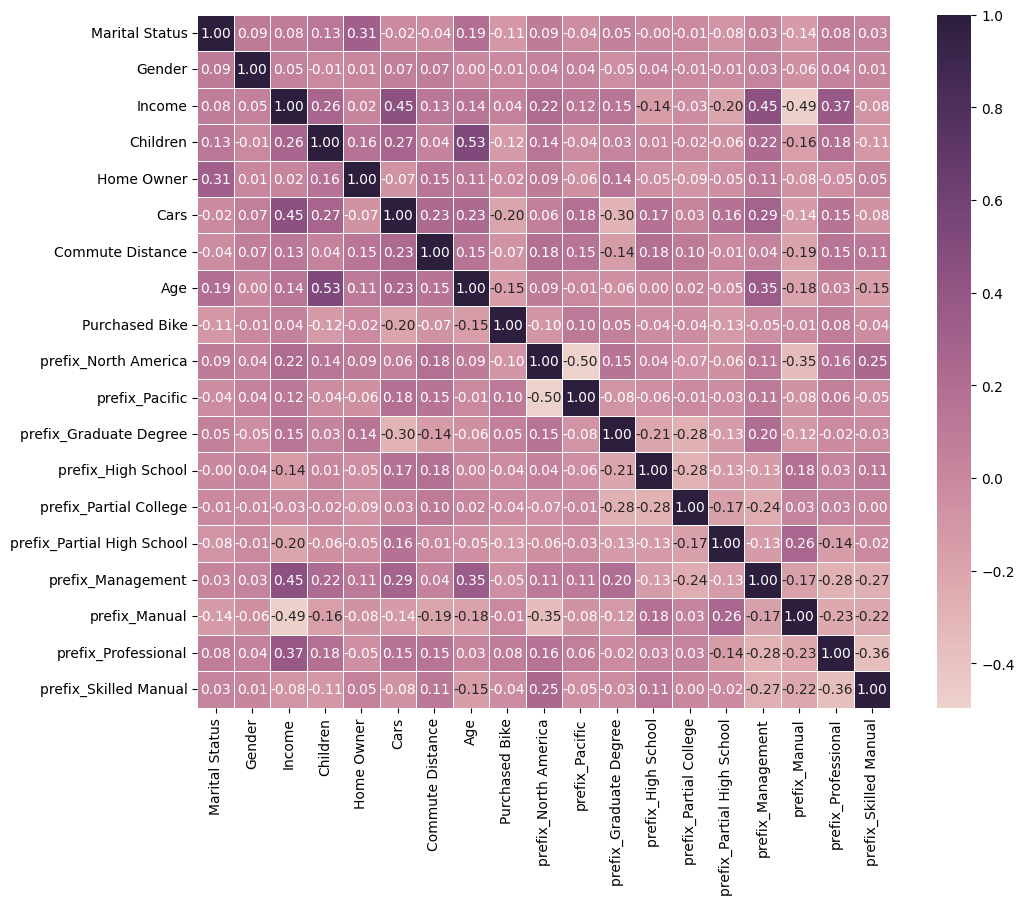

In [116]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.cubehelix_palette(as_cmap=True), square=True)

In [117]:
data.drop('Gender', axis=1, inplace=True)
data.drop('Income', axis=1, inplace=True)
data.drop('Home Owner', axis=1, inplace=True)
data.drop(new_cols2, axis=1, inplace=True)
data.drop(new_cols3, axis=1, inplace=True)


<AxesSubplot:>

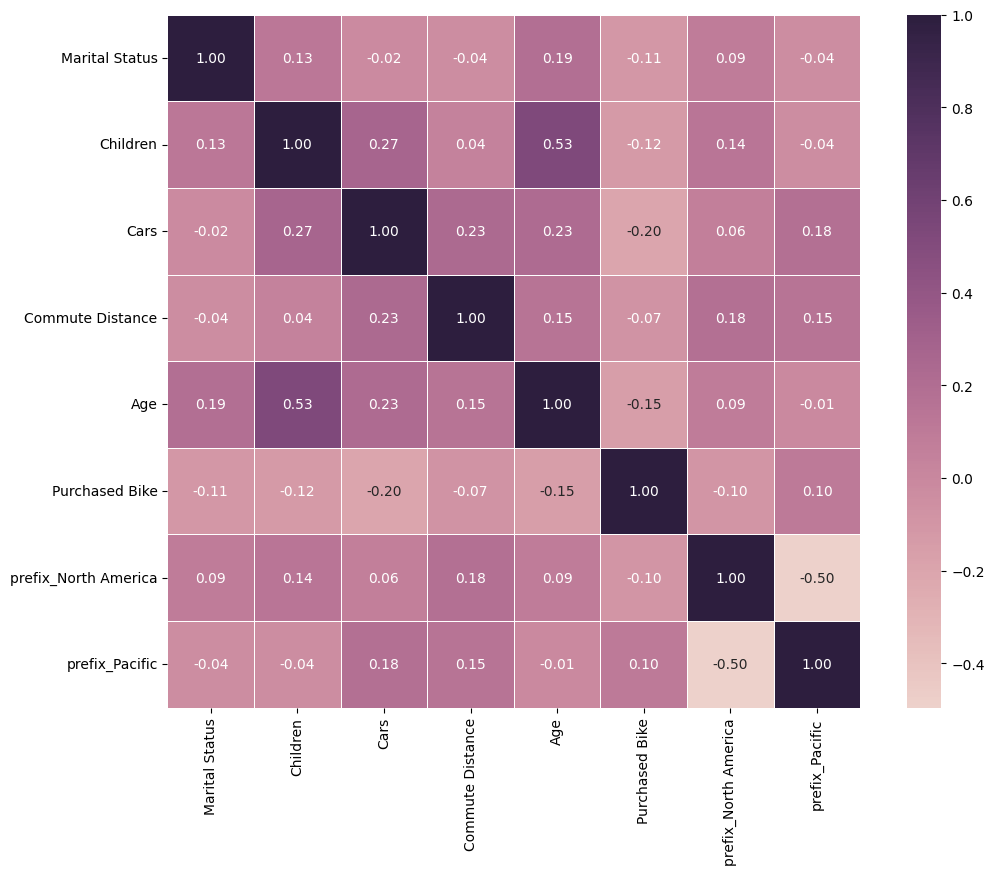

In [118]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.cubehelix_palette(as_cmap=True), square=True)

In [119]:
X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [120]:
y.value_counts()

0    519
1    481
Name: Purchased Bike, dtype: int64

In [121]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression())])

In [122]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       408
           1       0.58      0.60      0.59       342

    accuracy                           0.62       750
   macro avg       0.61      0.61      0.61       750
weighted avg       0.62      0.62      0.62       750
               precision    recall  f1-score   support

           0       0.65      0.61      0.63       132
           1       0.59      0.63      0.61       118

    accuracy                           0.62       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.62      0.62      0.62       250



Пытаемся по характеристикам человека понять, купит он велик или нет. 